In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
reviews = pd.read_csv("amazon_reviews.csv", index_col=None)

In [3]:
reviews.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
reviews.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewerName          4914 non-null   object 
 1   overall               4915 non-null   float64
 2   reviewText            4914 non-null   object 
 3   reviewTime            4915 non-null   object 
 4   day_diff              4915 non-null   int64  
 5   helpful_yes           4915 non-null   int64  
 6   helpful_no            4915 non-null   int64  
 7   total_vote            4915 non-null   int64  
 8   score_pos_neg_diff    4915 non-null   int64  
 9   score_average_rating  4915 non-null   float64
 10  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 422.5+ KB


In [6]:
# data cleaning
reviews.isna().sum()

reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [7]:
reviews.dropna(inplace=True)

In [8]:
reviews.isna().sum()

reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

<Axes: xlabel='overall', ylabel='count'>

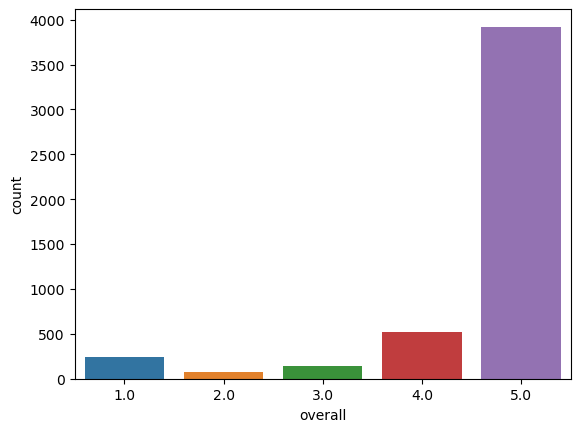

In [9]:
sns.countplot(data=reviews, x='overall')

<Axes: ylabel='count'>

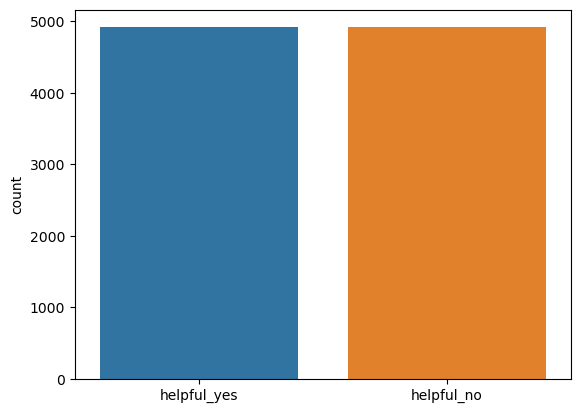

In [10]:
sns.countplot(reviews[['helpful_yes', 'helpful_no']])

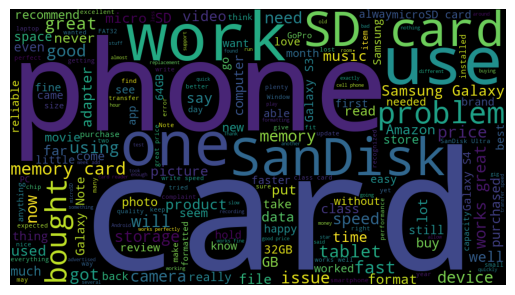

In [11]:
# wordCloud
from wordcloud import WordCloud

wc = WordCloud(width=900, height=500).generate(" ".join(reviews['reviewText']))
plt.axis('off')
plt.imshow(wc)

In [12]:
import re
import string

def processText(text):
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    
    return text

In [13]:
reviews['reviewText'] = reviews['reviewText'].apply(processText)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(reviews['reviewText'])

In [15]:
y = reviews['overall']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
predictions = model.predict(X_test)

In [19]:
# evalution
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[ 20   0   0   2  32]
 [  4   0   0   1   9]
 [  1   0   0   1  23]
 [  1   0   2   4 103]
 [  5   1   1  10 763]]


              precision    recall  f1-score   support

         1.0       0.65      0.37      0.47        54
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00        25
         4.0       0.22      0.04      0.06       110
         5.0       0.82      0.98      0.89       780

    accuracy                           0.80       983
   macro avg       0.34      0.28      0.29       983
weighted avg       0.71      0.80      0.74       983



In [30]:
test_data = {
    'reviewText': 'the memory card is an excellent condition and work as described dependable and easy to use an excellent choice for the enthusiast who requires more storage'
}

test_df = pd.DataFrame([test_data])
test_df['reviewText'] = test_df['reviewText'].apply(processText)

test_X = cv.transform(test_df['reviewText'])  # Using the same CountVectorizer instance
test_predictions = model.predict(test_X)

print("Predicted Ratings:", test_predictions)

Predicted Ratings: [5.]
